In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,recall_score

# Data Cleaning

In [3]:
data=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df=pd.DataFrame(data)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [6]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [7]:
df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'].fillna(df['Credit_History'].mode()[0])

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [8]:
df=df.dropna()

In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Data Preprocessing

In [11]:
# Checking the Outlier percentage in every numerical column
def calculate_outlier():
    cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
    for col in cols:
        IQR=df[col].quantile(0.75)-df[col].quantile(0.25)
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        lower_outlier_threshold=Q1-(1.5*IQR)
        upper_outlier_threshold=Q3+(1.5*IQR)
        outliers=[x for x in df[col] if x<lower_outlier_threshold or x>upper_outlier_threshold]
        no_of_outlier=(len(outliers)/len(df[col]))*100
        print(f"In the Column {col},There are {no_of_outlier}% Outliers are Present\n")

C:\Users\sacha\AppData\Local\Temp\ipykernel_18128\3626100070.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


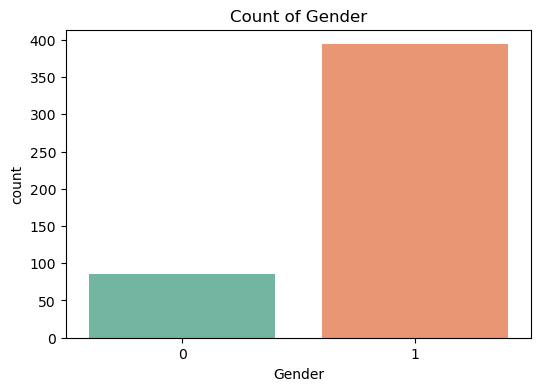

C:\Users\sacha\AppData\Local\Temp\ipykernel_18128\3626100070.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


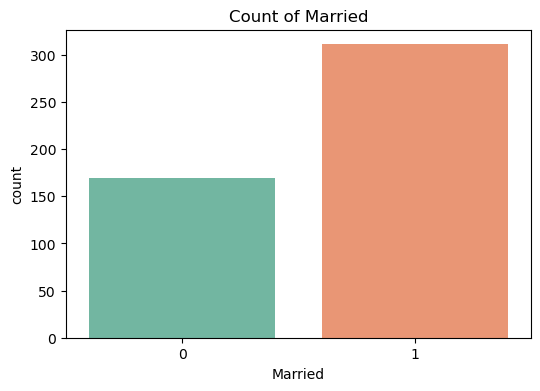

C:\Users\sacha\AppData\Local\Temp\ipykernel_18128\3626100070.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


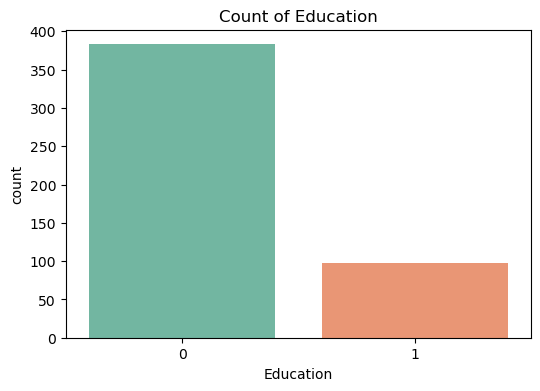

C:\Users\sacha\AppData\Local\Temp\ipykernel_18128\3626100070.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


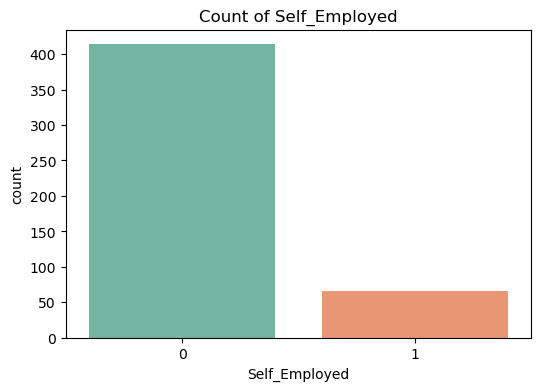

C:\Users\sacha\AppData\Local\Temp\ipykernel_18128\3626100070.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


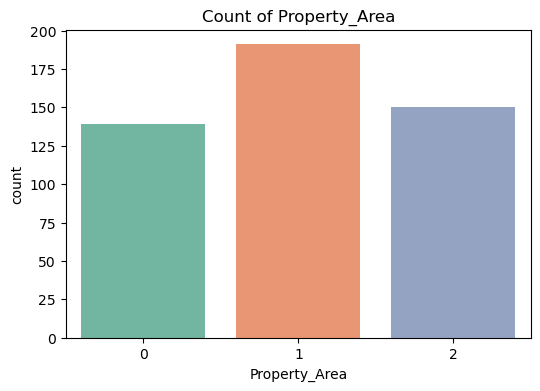

C:\Users\sacha\AppData\Local\Temp\ipykernel_18128\3626100070.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


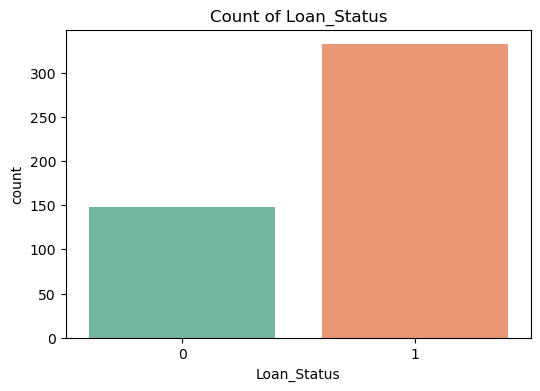

In [78]:
# Bar plots for categorical features
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette="Set2")
    plt.title(f"Count of {col}")
    plt.show()

<Figure size 2000x2000 with 0 Axes>

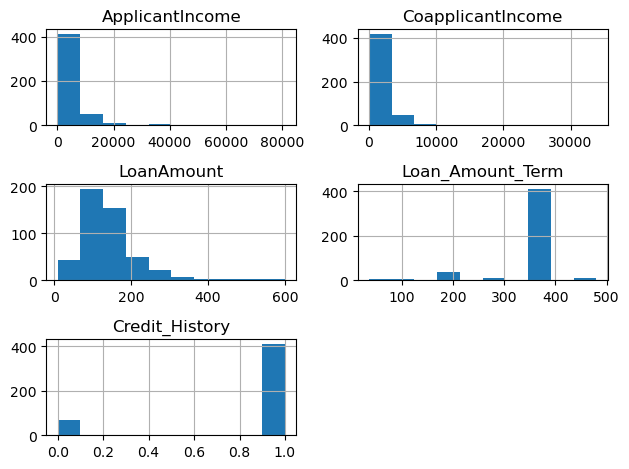

In [12]:
plt.figure(figsize=(20,20))
df.hist()
plt.tight_layout()

In [13]:
calculate_outlier()

In the Column ApplicantIncome,There are 8.333333333333332% Outliers are Present

In the Column CoapplicantIncome,There are 3.5416666666666665% Outliers are Present

In the Column LoanAmount,There are 5.625% Outliers are Present

In the Column Loan_Amount_Term,There are 14.374999999999998% Outliers are Present



<Axes: >

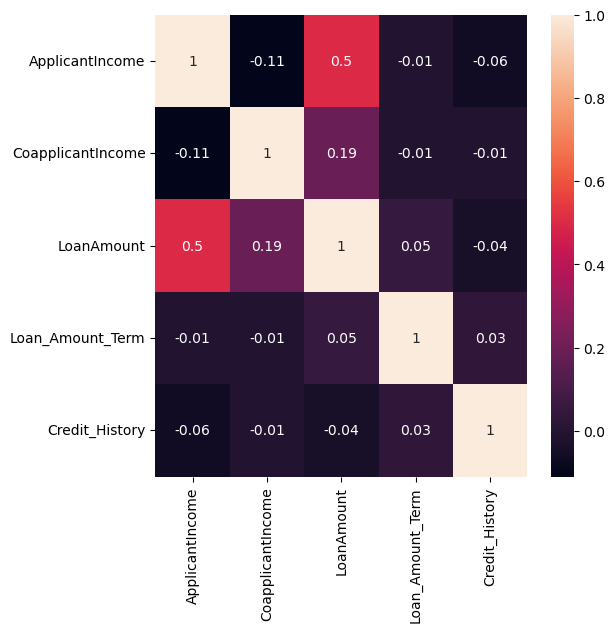

In [14]:
# Correlation
plt.figure(figsize=(6,6))
sns.heatmap(round(df.corr(numeric_only=True),2),annot=True)

In [15]:
cols=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']
Le=LabelEncoder()
for col in cols:
    df[col]=Le.fit_transform(df[col])
# Le=LabelEncoder()
# df['Gender']=Le.fit_transform(df['Gender'])
# df['Married']=Le.fit_transform(df['Married'])

C:\Users\sacha\AppData\Local\Temp\ipykernel_18128\4001013203.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=Le.fit_transform(df[col])
C:\Users\sacha\AppData\Local\Temp\ipykernel_18128\4001013203.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=Le.fit_transform(df[col])
C:\Users\sacha\AppData\Local\Temp\ipykernel_18128\4001013203.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [16]:
sc= StandardScaler()
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

df[cols] = sc.fit_transform(df[cols])

C:\Users\sacha\AppData\Local\Temp\ipykernel_18128\3634364415.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = sc.fit_transform(df[cols])


C:\Users\sacha\AppData\Local\Temp\ipykernel_18128\665484906.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=col, data=df, palette="Set3")


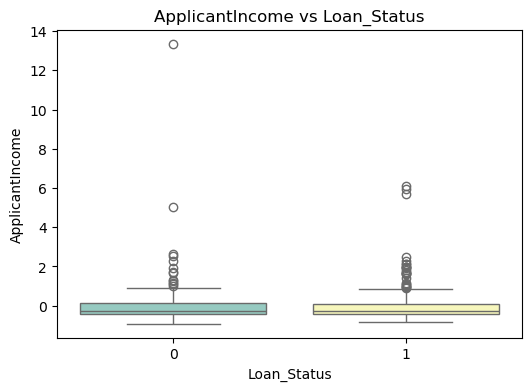

C:\Users\sacha\AppData\Local\Temp\ipykernel_18128\665484906.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=col, data=df, palette="Set3")


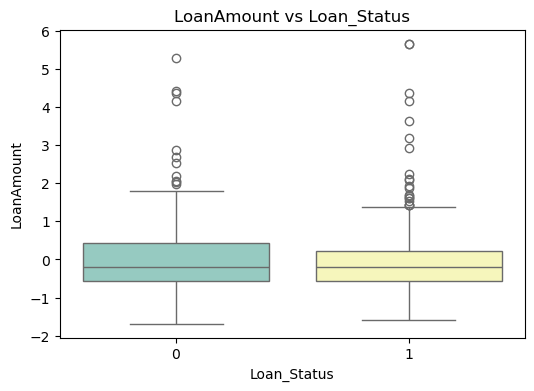

In [82]:
#Boxplots for numerical vs Loan_Status
for col in ['ApplicantIncome', 'LoanAmount']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Loan_Status', y=col, data=df, palette="Set3")
    plt.title(f"{col} vs Loan_Status")
    plt.show()

In [17]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,-0.137970,-0.027952,-0.208089,0.275542,1,0,0
2,LP001005,1,1,0,0,1,-0.417536,-0.604633,-0.979001,0.275542,1,2,1
3,LP001006,1,1,0,1,0,-0.491180,0.297100,-0.307562,0.275542,1,2,1
4,LP001008,1,0,0,0,0,0.112280,-0.604633,-0.046446,0.275542,1,2,1
5,LP001011,1,1,2,0,1,0.009319,0.999978,1.520245,0.275542,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,-0.435196,-0.604633,-0.916831,0.275542,1,0,1
610,LP002979,1,1,3,0,0,-0.222210,-0.604633,-1.302286,-2.487549,1,0,1
611,LP002983,1,1,1,0,0,0.478206,-0.512854,1.346168,0.275542,1,2,1
612,LP002984,1,1,2,0,0,0.391846,-0.604633,0.525520,0.275542,1,2,1


# Model Training

In [19]:
X=df.drop(['Loan_ID','Loan_Status'],axis=1)
y=df['Loan_Status']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Logistic Regression

In [22]:
model1=LogisticRegression()

In [23]:
model1.fit(X_test,y_test)

LogisticRegression()

In [24]:
y_pred=model1.predict(X_test)

In [25]:
m1_accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy Score: {m1_accuracy}")

Accuracy Score: 0.8229166666666666


In [26]:
m1_precision=precision_score(y_test,y_pred)
print(f"Precision Score:{m1_precision}")

Precision Score:0.8


In [27]:
m1_recall=recall_score(y_test,y_pred)
print(f"Recall Score:{m1_recall}")

Recall Score:1.0


In [28]:
m1_roc_auc=roc_auc_score(y_test,y_pred)
print(f"Roc Auc: {m1_roc_auc}")

Roc Auc: 0.6964285714285714


In [29]:
m1_confusion_mat=confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix: \n {m1_confusion_mat}")

Confusion Matrix: 
 [[11 17]
 [ 0 68]]


## Random Forest

In [31]:
model2=RandomForestClassifier(random_state=42,n_estimators=100,max_depth=5)

In [32]:
model2.fit(X_test,y_test)

RandomForestClassifier(max_depth=5, random_state=42)

In [33]:
y_predm2=model2.predict(X_test)

In [34]:
m2_accuracy=accuracy_score(y_test,y_predm2)
print(f"Accuracy Score: {m2_accuracy}")

Accuracy Score: 0.8854166666666666


In [35]:
m2_precision=precision_score(y_test,y_predm2)
print(f"Precision Score:{m2_precision}")

Precision Score:0.8607594936708861


In [36]:
m2_recall=recall_score(y_test,y_predm2)
print(f"Recall Score:{m2_recall}")

Recall Score:1.0


In [37]:
m2_roc_auc=roc_auc_score(y_test,y_predm2)
print(f"Roc Auc: {m2_roc_auc}")

Roc Auc: 0.8035714285714286


In [38]:
m2_confusion_mat=confusion_matrix(y_test,y_predm2)
print(f"Confusion Matrix: \n {m2_confusion_mat}")

Confusion Matrix: 
 [[17 11]
 [ 0 68]]


## Comparing Logistic and Random Forest Models

In [40]:
compare = [
    ['Model', 'Accuracy Score', 'Precision Score', 'Recall', 'ROC AUC', 'Confusion Matrix'],
    ['Logistic Regression', m1_accuracy, m1_precision, m1_recall, m1_roc_auc, m1_confusion_mat],
    ['Random Forest', m2_accuracy, m2_precision, m2_recall, m2_roc_auc, m2_confusion_mat]
]

compare_df = pd.DataFrame(compare[1:], columns=compare[0])
compare_df

,Model,Accuracy Score,Precision Score,Recall,ROC AUC,Confusion Matrix
0,Logistic Regression,0.822917,0.800000,1.0,0.696429,"[[11, 17], [0, 68]]"
1,Random Forest,0.885417,0.860759,1.0,0.803571,"[[17, 11], [0, 68]]"


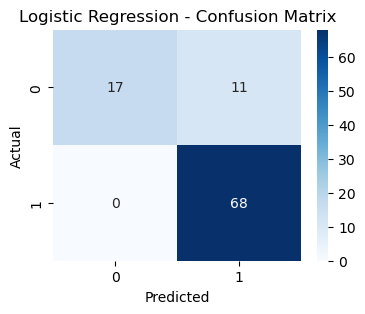

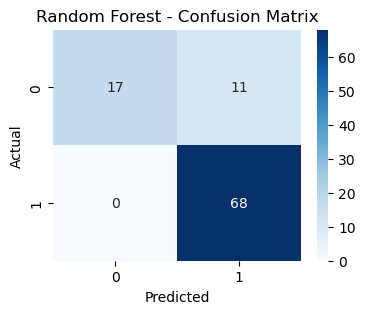

In [86]:
# Confusion Matrices
models = [("Logistic Regression", y_pred), ("Random Forest", y_predm2)]
for name, y_pred in models:
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [ ]:
plt.figure(figsize=(6,4))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()